<a href="https://colab.research.google.com/github/deeplearning-itba/NLP-Embeddings/blob/master/06_glove_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Agregar este archivo a la carpeta de google drive clickeando en el link y clickeando el '+' arriba a la derecha

https://drive.google.com/open?id=1jJ20oNZIysi-V-iORAE0eEZq4LhuWxUW

In [1]:
import codecs
import numpy as np

In [2]:
! wget http://nlp.stanford.edu/data/glove.6B.zip

--2019-10-24 17:00:35--  http://nlp.stanford.edu/data/glove.6B.zip
Resolviendo nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Conectando con nlp.stanford.edu (nlp.stanford.edu)[171.64.67.140]:80... conectado.
Petición HTTP enviada, esperando respuesta... 302 Found
Ubicación: https://nlp.stanford.edu/data/glove.6B.zip [siguiente]
--2019-10-24 17:00:35--  https://nlp.stanford.edu/data/glove.6B.zip
Conectando con nlp.stanford.edu (nlp.stanford.edu)[171.64.67.140]:443... conectado.
Petición HTTP enviada, esperando respuesta... 301 Moved Permanently
Ubicación: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [siguiente]
--2019-10-24 17:00:36--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolviendo downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Conectando con downloads.cs.stanford.edu (downloads.cs.stanford.edu)[171.64.64.22]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 862182613 (822M) [application/zip]
Guard

In [3]:
! unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [4]:
# EMBEDDING_DIR = "/content/drive/My Drive/"
EMBEDDING_DIR = "./"


In [5]:
def load_embeddings(file, embed_dim=100):
  #load embeddings

  print('loading word embeddings...')
  embeddings_index = {}
  f = codecs.open(EMBEDDING_DIR+'glove.6B.100d.txt', encoding='utf-8')
  for line in f:
      values = line.rstrip().rsplit(' ')
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs
  f.close()
  print('found %s word vectors' % len(embeddings_index))
  return embeddings_index

In [6]:
# embeddings_index = load_embeddings(EMBEDDING_DIR+'glove.6B.300d.txt', embed_dim=300)
embeddings_index = load_embeddings(EMBEDDING_DIR+'glove.6B.100d.txt')

loading word embeddings...
found 400000 word vectors


In [32]:
# Armar matriz de embedigs de 400000x100
matrix_word_vectors = np.array(list(embeddings_index.values())) # Se puede armar en una linea haciendo un cast a np.array y un .values del dict
# Aramr lista con vocabilario
vocab_list = list(embeddings_index.keys()) # Se puede armar con una linea .keys del dict

In [33]:
matrix_word_vectors.shape

(400000, 100)

In [34]:
from sklearn.neighbors import NearestNeighbors

# Entrenar un modelo de Nearest neighbours con los 20 primeros y distancia coseno

In [36]:
nearest = NearestNeighbors(20, metric='cosine')

In [37]:
# Entrenar modelo
nearest.fit(matrix_word_vectors)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                 radius=1.0)

In [42]:
embeddings_index['woman']

array([ 0.59368 ,  0.44825 ,  0.5932  ,  0.074134,  0.11141 ,  1.2793  ,
        0.16656 ,  0.2407  ,  0.39045 ,  0.32766 , -0.75034 ,  0.35007 ,
        0.76057 ,  0.38067 ,  0.17517 ,  0.031791,  0.46849 , -0.21653 ,
       -0.46282 ,  0.39967 ,  0.16623 , -0.011477,  0.044059,  0.30325 ,
        0.6153  ,  0.47047 , -0.44036 , -1.5963  ,  0.18433 ,  0.23193 ,
        0.20452 ,  0.51617 ,  0.65734 , -0.3452  ,  0.23446 , -0.62004 ,
       -0.68741 ,  0.28575 ,  1.0605  ,  0.46916 , -0.85149 ,  0.10154 ,
        0.21426 , -0.20587 ,  0.23636 ,  0.21321 , -0.21287 ,  0.12107 ,
        0.18766 , -0.23282 , -0.25499 , -0.39631 ,  0.84379 ,  1.6801  ,
       -0.40941 , -1.9976  , -0.69868 ,  0.21732 ,  1.2197  ,  0.55126 ,
        0.44095 ,  0.72588 , -0.092053, -0.022406,  0.72039 ,  0.1076  ,
        0.84116 ,  0.30312 , -0.42544 ,  0.056362,  0.13109 , -0.071181,
       -0.10579 ,  0.56677 ,  0.54547 ,  0.84113 ,  0.14861 , -0.62628 ,
       -0.68391 , -1.0831  , -0.088385,  0.32167 , 

In [73]:
def get_analogy(word1, word2, word3, embeddings_index=embeddings_index):
    # word1 es a word2 como word3 es a word4
    # Tiene que devolver word4
    embed_word = -embeddings_index[word1] + embeddings_index[word2] + embeddings_index[word3]
    distances, nearest_indexes = nearest.kneighbors(embed_word.reshape(1, -1))
    nearest_words = [vocab_list[i] for i in nearest_indexes[0]]
    if word1 in nearest_words: nearest_words.remove(word1)
    if word2 in nearest_words: nearest_words.remove(word2)
    if word3 in nearest_words: nearest_words.remove(word3)
    return nearest_words

In [78]:
# Probar las siguientes analogías
#
# woman -> man, queen -> ?
# england -> london, france-> ?
# woman -> women, man -> ?
# messi -> soccer, federer -> ?
# switzerland -> alps, argentina ->

get_analogy('switzerland', 'alps', 'argentina')

['andes',
 'pyrenees',
 'peru',
 'argentine',
 'foothills',
 'apennines',
 'brazil',
 'portugal',
 'patagonia',
 'portuguese',
 'juniors',
 'chaco',
 'mountains',
 'coast',
 'slopes',
 'paraguay',
 'madeira',
 'pampas']

In [81]:
def get_nearests_words(vector, nearest=nearest):
    # Dado un vector, tiene que devolver la lista de los 20 mas cercanos
    distances, nearest_indexes = nearest.kneighbors(vector.reshape(1, -1))
    words_list = [vocab_list[i] for i in nearest_indexes[0]] 
    return words_list

In [110]:
# Probar función get_nearests_words
get_nearests_words(embeddings_index['doctor'] + embeddings_index['engineer'] + embeddings_index['economist']+ embeddings_index['musician'])

['engineer',
 'musician',
 'scientist',
 'consultant',
 'author',
 'professor',
 'director',
 'dr.',
 'writer',
 'worked',
 'doctor',
 'teacher',
 'artist',
 'educator',
 'physician',
 'researcher',
 'economist',
 'expert',
 'friend',
 'composer']

In [83]:
animals = ['dog',
 'cat',
 'dogs',
 'pet',
 'puppy',
 'horse',
 'animal',
 'pig',
 'boy',
 'cats',
 'rabbit',
 'goat',
 'sled',
 'monkey',
 'cow',
 'rat',
 'breed',
 'mad',
 'hound',
 'bird']

In [84]:
transport = ['car',
 'vehicle',
 'truck',
 'cars',
 'driver',
 'driving',
 'motorcycle',
 'vehicles',
 'parked',
 'bus',
 'taxi',
 'suv',
 'pickup',
 'jeep',
 'mercedes',
 'cab',
 'bicycle',
 'drivers',
 'automobile',
 'train']

In [85]:
countries = ['argentina',
 'england',
 'australia',
 'spain',
 'brazil',
 'portugal',
 'zealand',
 'scotland',
 'match',
 'africa',
 'wales',
 'ireland',
 'italy',
 'matches',
 'france',
 'indies',
 'uruguay',
 'britain',
 'netherlands',
 'united']

In [86]:
professions = ['engineer',
 'scientist',
 'economist',
 'professor',
 'consultant',
 'director',
 'dr.',
 'doctor',
 'researcher',
 'expert',
 'physician',
 'officer',
 'surgeon',
 'chief',
 'assistant',
 'specialist',
 'associate',
 'author',
 'worked',
 'psychologist']

In [87]:
all_words = animals + transport + countries + professions

In [88]:
vectors_subset = np.array([embeddings_index[word] for word in all_words])

In [89]:
from sklearn.manifold import TSNE

In [90]:
tsne = TSNE(2, verbose=1)

In [94]:
%time embed_2d_tsne = tsne.fit_transform(vectors_subset)

[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.000s...
[t-SNE] Computed neighbors for 80 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 3.172693
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.538227
[t-SNE] KL divergence after 1000 iterations: 0.239502
CPU times: user 552 ms, sys: 385 ms, total: 937 ms
Wall time: 228 ms


In [95]:
from matplotlib import pyplot as plt

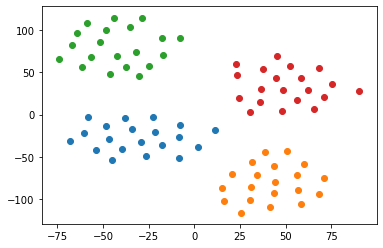

In [96]:
for i in range(4):
  plt.scatter(embed_2d_tsne[i*20:(i+1)*20,0], embed_2d_tsne[i*20:(i+1)*20,1], c=f'C{i}')